In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

In [2]:
# 参考 08 Arevalo 取log bin的函数

def databin_are(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j]))
    return output        
            

def databin_are_std(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

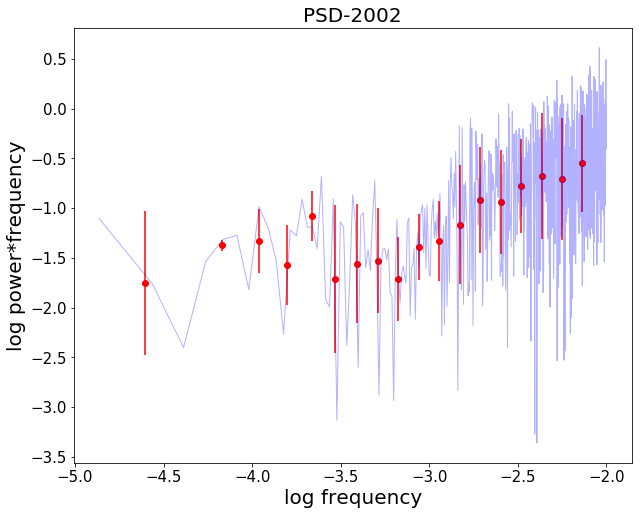

In [3]:
data02 = pd.read_csv("rate_1h0707_02_210_tb50.csv")
data02['RATE'] = data02['RATE'].interpolate()


dt=50
counts_data = data02['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_02 = [math.log(i,10) for i in F1]
ptf_data_log_02 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_02 = databin_are(F1,F1)
per_data_binned_02 = databin_are(per_data,F1)
per_data_b_std_02 = databin_are_std(per_data,F1)
p_times_f_data_b_02 = np.array(F1_binned_02)+np.array(per_data_binned_02)


plt.figure(figsize=(10,8))
plt.plot(F1_log_02, ptf_data_log_02, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_02, p_times_f_data_b_02, color="r", linewidth=1) 
plt.errorbar(F1_binned_02, p_times_f_data_b_02, yerr=per_data_b_std_02, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2002",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_02 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_02,columns = ['f','per'])
test.to_csv('perlist02_h.csv')

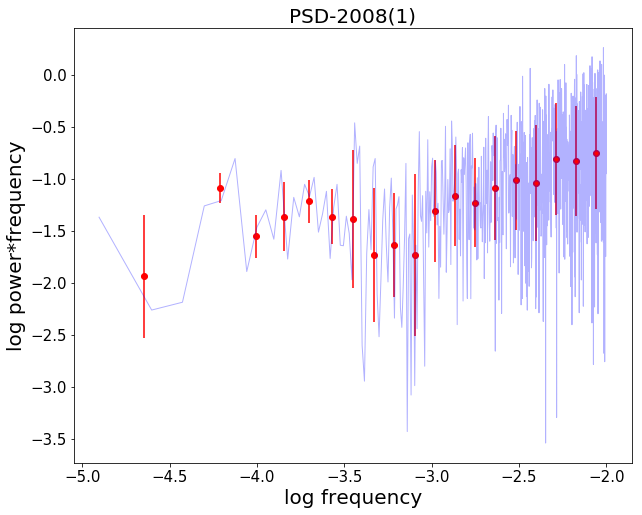

In [4]:
data081 = pd.read_csv("rate_1h0707_081_210_tb50.csv")
data081['RATE'] = data081['RATE'].interpolate()


dt=50
counts_data = data081['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_081 = [math.log(i,10) for i in F1]
ptf_data_log_081 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_081 = databin_are(F1,F1)
per_data_binned_081 = databin_are(per_data,F1)
per_data_b_std_081 = databin_are_std(per_data,F1)
p_times_f_data_b_081 = np.array(F1_binned_081)+np.array(per_data_binned_081)


plt.figure(figsize=(10,8))
plt.plot(F1_log_081, ptf_data_log_081, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_081, p_times_f_data_b_081, color="r", linewidth=1) 
plt.errorbar(F1_binned_081, p_times_f_data_b_081, yerr=per_data_b_std_081, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2008(1)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_081 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_081,columns = ['f','per'])
test.to_csv('perlist081_h.csv')

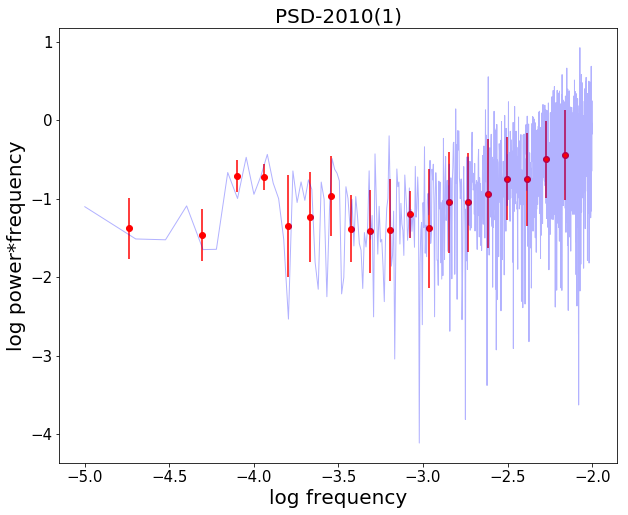

In [5]:
data101 = pd.read_csv("rate_1h0707_101_210_tb50.csv")
data101['RATE'] = data101['RATE'].interpolate()


dt=50
counts_data = data101['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_101 = [math.log(i,10) for i in F1]
ptf_data_log_101 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_101 = databin_are(F1,F1)
per_data_binned_101 = databin_are(per_data,F1)
per_data_b_std_101 = databin_are_std(per_data,F1)
p_times_f_data_b_101 = np.array(F1_binned_101)+np.array(per_data_binned_101)


plt.figure(figsize=(10,8))
plt.plot(F1_log_101, ptf_data_log_101, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_101, p_times_f_data_b_101, color="r", linewidth=1) 
plt.errorbar(F1_binned_101, p_times_f_data_b_101, yerr=per_data_b_std_101, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2010(1)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_101 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_101,columns = ['f','per'])
test.to_csv('perlist101_h.csv')

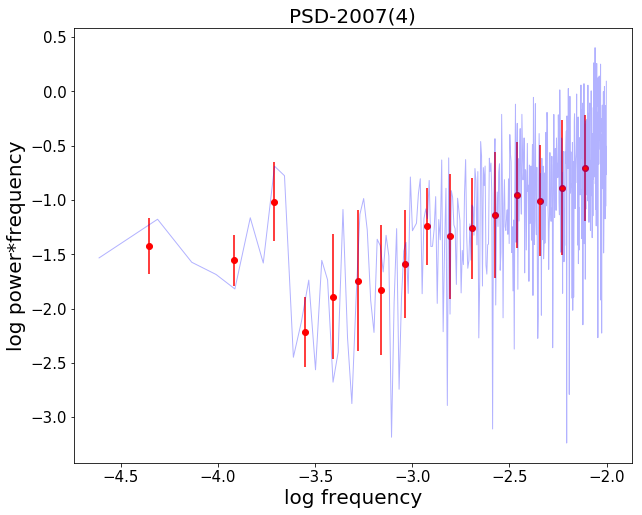

In [6]:
data074 = pd.read_csv("rate_1h0707_074_210_tb50.csv")
data074['RATE'] = data074['RATE'].interpolate()


dt=50
counts_data = data074['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_074 = [math.log(i,10) for i in F1]
ptf_data_log_074 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_074 = databin_are(F1,F1)
per_data_binned_074 = databin_are(per_data,F1)
per_data_b_std_074 = databin_are_std(per_data,F1)
p_times_f_data_b_074 = np.array(F1_binned_074)+np.array(per_data_binned_074)


plt.figure(figsize=(10,8))
plt.plot(F1_log_074, ptf_data_log_074, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_074, p_times_f_data_b_074, color="r", linewidth=1) 
plt.errorbar(F1_binned_074, p_times_f_data_b_074, yerr=per_data_b_std_074, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2007(4)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_074 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_074,columns = ['f','per'])
test.to_csv('perlist074_h.csv')

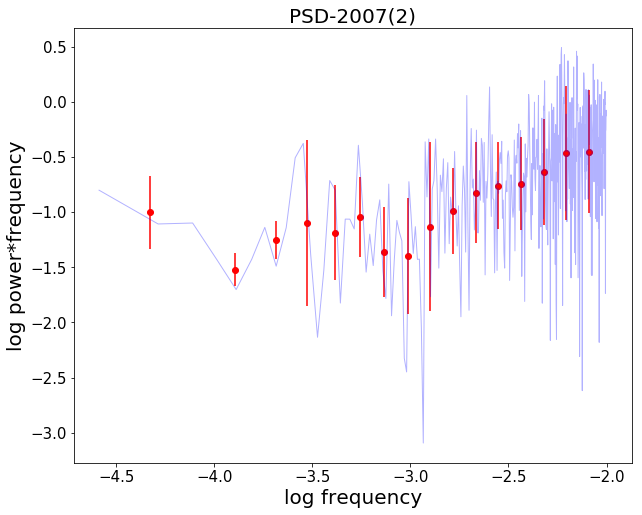

In [7]:
data072 = pd.read_csv("rate_1h0707_072_210_tb50.csv")
data072['RATE'] = data072['RATE'].interpolate()


dt=50
counts_data = data072['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_072 = [math.log(i,10) for i in F1]
ptf_data_log_072 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_072 = databin_are(F1,F1)
per_data_binned_072 = databin_are(per_data,F1)
per_data_b_std_072 = databin_are_std(per_data,F1)
p_times_f_data_b_072 = np.array(F1_binned_072)+np.array(per_data_binned_072)


plt.figure(figsize=(10,8))
plt.plot(F1_log_072, ptf_data_log_072, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_072, p_times_f_data_b_072, color="r", linewidth=1) 
plt.errorbar(F1_binned_072, p_times_f_data_b_072, yerr=per_data_b_std_072, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2007(2)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_072 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_072,columns = ['f','per'])
test.to_csv('perlist072_h.csv')